In [23]:
# import pandas as pd

# # Step 1: Define the desired columns from game_plays.csv (first 8)
# plays_cols = [
#     'play_id', 'game_id', 'team_id_for', 'team_id_against',
#     'event', 'secondaryType', 'x', 'y'
# ]

# # Step 2: Load ONLY the first 50,000 rows of game_plays.csv with the specified columns
# game_plays = pd.read_csv('game_plays.csv', usecols=plays_cols, nrows=50000)

# # Filter to only include game_ids starting with '2016'
# game_plays = game_plays[game_plays['game_id'].astype(str).str.startswith('2016')]

# # Step 3: Define the exact columns from game_teams_stats.csv to keep
# team_stats_cols = [
#     'game_id', 'team_id', 'HoA', 'won',
#     'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
#     'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked', 'startRinkSide'
# ]

# # Step 4: Load filtered game_teams_stats.csv
# game_teams_stats = pd.read_csv('game_teams_stats.csv', usecols=team_stats_cols)

# # Also filter team stats to match 2016 games only
# game_teams_stats = game_teams_stats[game_teams_stats['game_id'].astype(str).str.startswith('2016')]

# # Step 5: Merge on 'game_id'
# merged = pd.merge(game_plays, game_teams_stats, on='game_id', how='left')

# # Step 6: Save to CSV
# merged.to_csv('merged_filtered_output_2016_50k.csv', index=False)


In [24]:
print('freaky ahh')

freaky ahh


In [ ]:
# Name : 
# Assignment Number & Name : EDA - NHL Win Classification
# I pledge my honor that I have abided by the Stevens Honor System.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the NHL dataset
file_path = 'merged_with_won.csv'
df = pd.read_csv(file_path)

# Filter: drop unneeded columns and keep only one row per team per game
df = df.drop(columns=['game_id', 'team_id_for', 'team_id_against', 'play_id', 'event', 'secondaryType', 'startRinkSide'], errors='ignore')
df = df.dropna(subset=['won'])
df['won'] = df['won'].astype(int)

# Keep only numeric columns for correlation
numeric_only = df.select_dtypes(include='number')

# Show summary statistics
print(numeric_only.describe())
df.head()


                  x             y       team_id         shots          hits  \
count  29374.000000  29374.000000  36538.000000  36538.000000  36538.000000   
mean       0.537823     -0.194934     19.636433     30.754201     22.451092   
std       64.139055     23.283882     14.878139      7.575772      7.530658   
min      -99.000000    -42.000000      1.000000     15.000000      4.000000   
25%      -68.000000    -22.000000      9.000000     26.000000     17.000000   
50%        0.000000      0.000000     16.000000     29.000000     21.000000   
75%       69.000000     22.000000     26.000000     35.000000     28.000000   
max       99.000000     42.000000     53.000000     60.000000     42.000000   

                pim  powerPlayOpportunities  powerPlayGoals  \
count  36538.000000            36538.000000    36538.000000   
mean       9.929662                3.045542        0.649488   
std       12.351742                1.561752        0.702320   
min        0.000000                0

,x,y,team_id,HoA,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,won
0,NaN,NaN,4,away,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,0
1,NaN,NaN,16,home,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,1
2,NaN,NaN,4,away,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,0
3,NaN,NaN,16,home,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,1
4,NaN,NaN,4,away,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,0


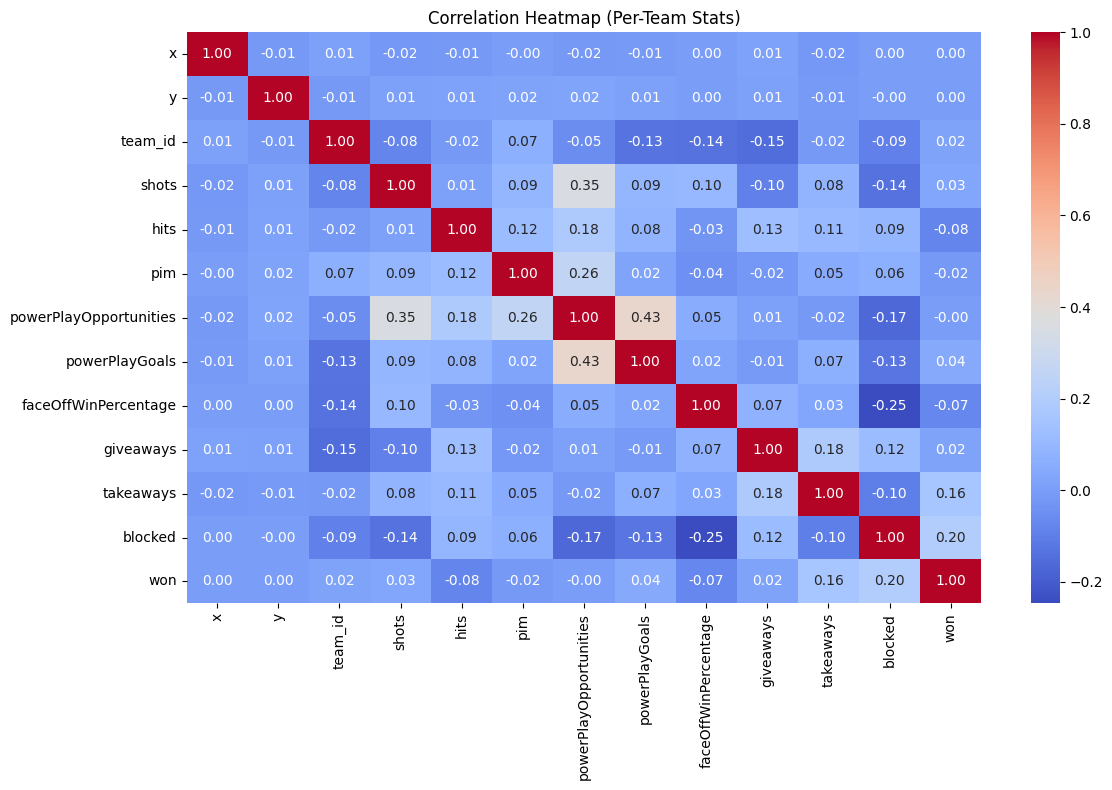

In [26]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_only.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Per-Team Stats)")
plt.tight_layout()
plt.show()


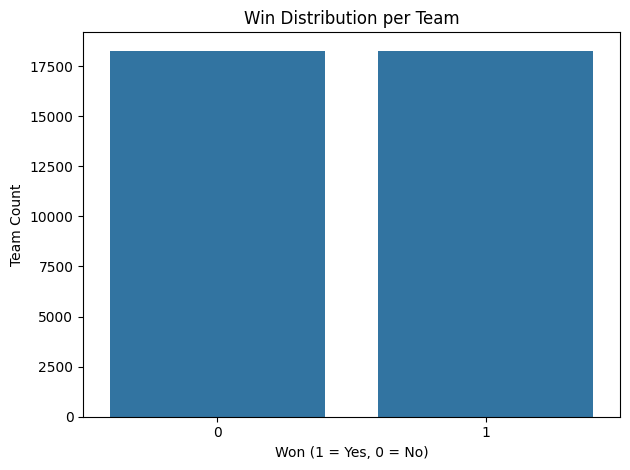

In [27]:
# Win Distribution (per team)
sns.countplot(data=df, x='won')
plt.title("Win Distribution per Team")
plt.xlabel("Won (1 = Yes, 0 = No)")
plt.ylabel("Team Count")
plt.tight_layout()
plt.show()


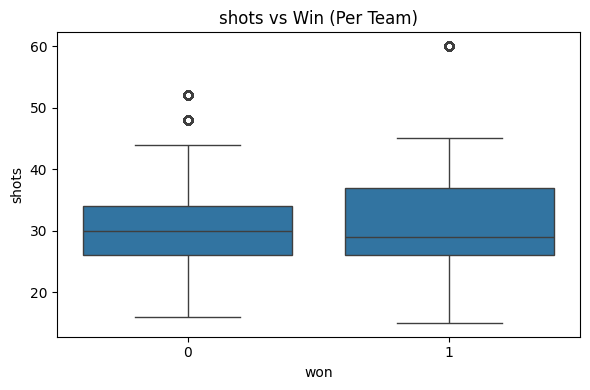

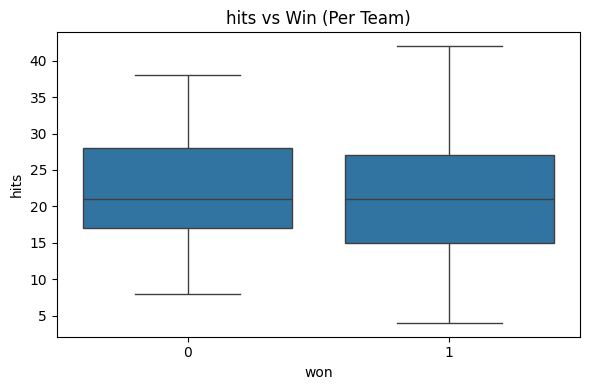

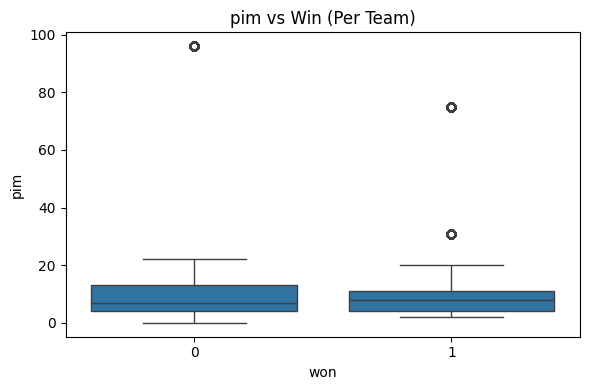

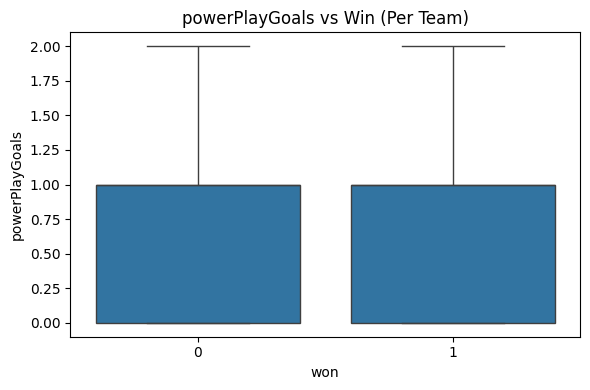

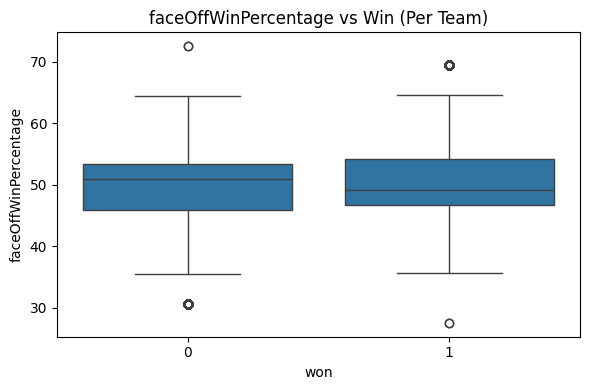

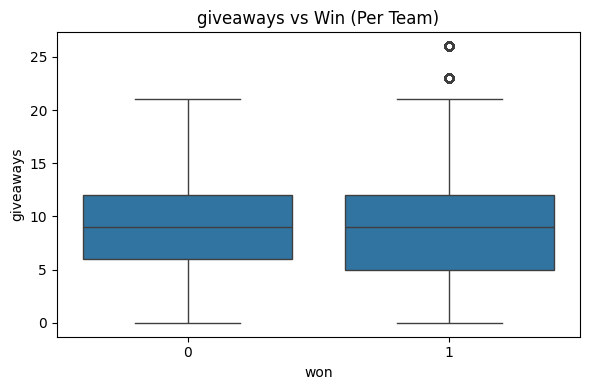

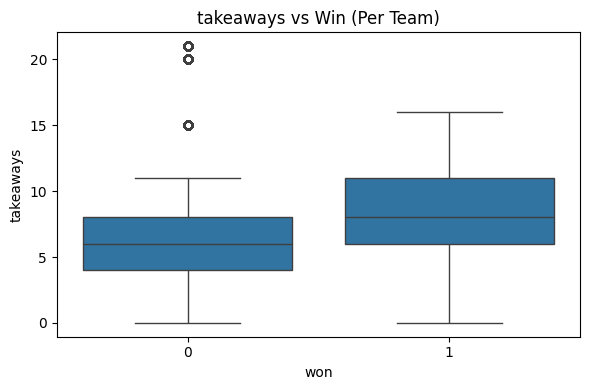

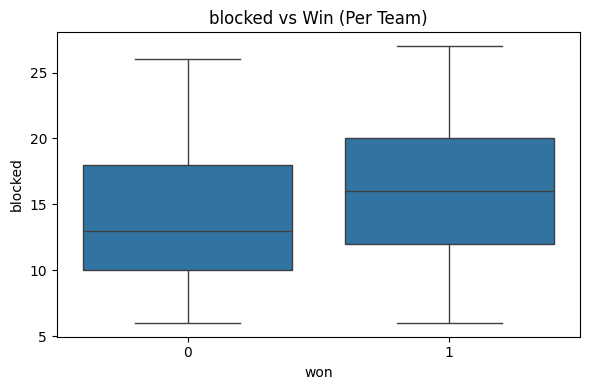

In [28]:
# Boxplots: team-level stats vs won
features = ['shots', 'hits', 'pim', 'powerPlayGoals', 'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked']
for f in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='won', y=f)
    plt.title(f"{f} vs Win (Per Team)")
    plt.tight_layout()
    plt.show()
